# PROYECTO FINAL GRA02: ¿Por qué debería España organizar el mundial de 2030?
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---


## Índice
1. [Introducción](#id0)
2. [Importación de datasets](#id1)
3. [Primera fase de preprocesamiento de datos](#id2)
4. [Analisis de los datos](#id3)
5. [Segunda fase de preprocesamiento de datos](#id4)
6. [Análisis de componentes principales (PCA)](#id5)
7. [Clustering](#id6)
8. [Regresión lineal](#id7)


<div id='id0'>

## Introducción
---
**“El fútbol es la cosa más importante de las cosas menos importante”, Arriago Sacchi.**

El fútbol es una pasión que une a millones de personas en todo el mundo y la Copa del Mundo de la FIFA es una competición que destaca sobre todas las demás. España debería presentar su candidatura para acoger el Mundial de 2030, ya que esto no solo sería emocionante y espectacular, sino que también tendría un impacto económico y social significativo para el país. El fútbol es mucho más que una simple afición, es un motor de cambio y una fuente de inspiración que puede unir a las personas más allá de las fronteras y diferencias culturales.

---

#### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.decomposition import PCA
from tabulate import tabulate
from sklearn.cluster import KMeans
from collections import OrderedDict
from sklearn.linear_model import LinearRegression


<div id='id1'>

## Importación de Datasets
---



In [2]:
#DataSet que contiene el podio de los últimos mundiales
datasetFifa = pd.read_csv("Historical_fifa_Awards_Winners/FIFA-Winners.csv")
datasetFifa.head(5)

,Year,Champion,second,third,host,teams,matches,goals
0,2022,Argentina,France,Croatia,Qatar,32,64,172
1,2018,France,Croatia,Belgium,Russia,32,64,169
2,2014,Germany,Argentina,Netherlands,Brazil,32,64,171
3,2010,Spain,Netherlands,Germany,South Africa,32,64,145
4,2006,Italy,France,Germany,Germany,32,64,147


In [3]:
datasetGDP = pd.read_csv("PIB-GDP/countries_gdp_hist.csv", sep = ";")
datasetGDP.head(5)

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,0.0


In [4]:
df_young_player = pd.read_csv("Historical_fifa_Awards_Winners/young_player.csv")
df_young_player = df_young_player.loc[(df_young_player["Year"] >= 1960) & (df_young_player["Year"] < 2022)]
df_young_player.head(20)

,Year,World Cup,Year.1,Country,FIFA Young Player,Age,Continent
1,1962,Chile,1962,Hungary,Flórián Albert,20,Europe
2,1966,England,1966,Germany,Franz Beckenbauer,20,Europe
3,1970,Mexico,1970,Peru,Teófilo Cubillas,21,South America
4,1974,West Germany,1974,Poland,Władysław Żmuda,20,Europe
5,1978,Argentina,1978,Italy,Antonio Cabrini,20,Europe
6,1982,Spain,1982,France,Manuel Amoros,21,Europe
7,1986,Mexico,1986,Belgium,Enzo Scifo,20,Europe
8,1990,Italy,1990,Yugoslavia,Robert Prosinečki,21,Europe
9,1994,United States,1994,Netherlands,Marc Overmars,20,Europe
10,1998,France,1998,England,Michael Owen,18,Europe


In [5]:
df_goldenBall = pd.read_csv("Historical_fifa_Awards_Winners/GoldeSilverBronze Ball by player.csv")
df_goldenBall = df_goldenBall.loc[(df_goldenBall["Year"] >= 1960) & (df_goldenBall["Year"] < 2022)]
df_goldenBall.head(20)

,Year,World Cup,Golden Ball,Continent
0,1962,"""Brazil""",Garrincha,Europe
1,1966,"""England""",Charlton,Europe
2,1970,"""Brazil""",Pele,South America
3,1978,"""Argentina""",Mario Kempes,South America
4,1982,"""Spain""",Paolo Rossi,Europe
5,1986,"""Mexico""",Diego Maradona,South America
6,1990,"""Italy""",Salvatore Schillaci,Europe
7,1994,"""United States""",Romário,South America
8,1998,"""France""",Ronaldo,South America
9,2002,South Korea/Japan,Oliver Kahn,Europe


In [6]:
df_goals_match = pd.read_csv("Historical_fifa_Awards_Winners/FIFA-Winners.csv")
df_goals_match = df_goals_match[['Year','Champion', 'goals', 'matches']]
df_goals_match['goals_per_match'] = df_goals_match['goals'] / df_goals_match['matches']
df_goals_match = df_goals_match.loc[(df_goals_match["Year"] >= 1960) & (df_goals_match["Year"] < 2022)]
df_goals_match.head(30)

,Year,Champion,goals,matches,goals_per_match
1,2018,France,169,64,2.640625
2,2014,Germany,171,64,2.671875
3,2010,Spain,145,64,2.265625
4,2006,Italy,147,64,2.296875
5,2002,Brazil,161,64,2.515625
6,1998,France,171,64,2.671875
7,1994,Brazil,141,52,2.711538
8,1990,Germany,115,52,2.211538
9,1986,Argentina,132,52,2.538462
10,1982,Italy,146,52,2.807692


In [7]:
df_attendance = pd.read_csv("Historical_fifa_Awards_Winners/FIFA_Attendance.csv")
cols_to_keep = ["Year", "Hosts", "Venues", "Totalattendance", "Matches", "Averageattendance"]
df_attendance = df_attendance.loc[(df_attendance["Year"] >= 1960) & (df_attendance["Year"] < 2022)]
df_attendance = df_attendance[['Year','Hosts', 'Venues', 'Totalattendance †', 'Averageattendance']]
df_attendance.head(20)

,Year,Hosts,Venues,Totalattendance †,Averageattendance
6,1962,Chile,4,"893,172","27,912"
7,1966,England,8,"1,563,135","48,848"
8,1970,Mexico,5,"1,603,975","50,124"
9,1974,West Germany,9,"1,865,753","49,099"
10,1978,Argentina,6,"1,545,791","40,679"
11,1982,Spain,17,"2,109,723","40,572"
12,1986,Mexico,12,"2,394,031","46,039"
13,1990,Italy,12,"2,516,215","48,389"
14,1994,United States,9,"3,587,538","68,991"
15,1998,France,10,"2,785,100","43,517"


<div id='id2'>

## Primera fase de preprocesamiento de datos
---

### Limpieza de datos

In [8]:
datasetFifa = datasetFifa[['Year','Champion', 'second', 'third', 'host']]

# Asegúrate de que la columna "Year" sea numérica
datasetFifa["Year"] = pd.to_numeric(datasetFifa["Year"], errors="coerce")

# Filtra las filas según la condición Year >= 1960
datasetFifa = datasetFifa.loc[(datasetFifa["Year"] >= 1960) & (datasetFifa["Year"] < 2022)]

datasetFifa.head(20)

,Year,Champion,second,third,host
1,2018,France,Croatia,Belgium,Russia
2,2014,Germany,Argentina,Netherlands,Brazil
3,2010,Spain,Netherlands,Germany,South Africa
4,2006,Italy,France,Germany,Germany
5,2002,Brazil,Germany,Turkey,"South Korea, Japan"
6,1998,France,Brazil,Croatia,France
7,1994,Brazil,Italy,Sweden,United States
8,1990,Germany,Argentina,Italy,Italy
9,1986,Argentina,Germany,France,Mexico1
10,1982,Italy,Germany,Poland,Spain


Como no se tienen datos de GDP de países antes de 1960 se ha decidido eliminar la información de estos países en los mundiales.

In [9]:
datasetGDP = datasetGDP[['country_name','year', 'total_gdp_million', 'gdp_variation']]
datasetGDP.head(5)

,country_name,year,total_gdp_million,gdp_variation
0,Aruba,1960,0.0,0.0
1,Aruba,1961,0.0,0.0
2,Aruba,1962,0.0,0.0
3,Aruba,1963,0.0,0.0
4,Aruba,1964,0.0,0.0


In [10]:
# Obtener lista de países del primer conjunto de datos
countries = datasetFifa['Champion'].append([datasetFifa['second'], datasetFifa['third'], datasetFifa['host']]).unique()
# Seleccionar solo los países que están presentes en la lista de países del primer conjunto de datos
df_gdp_filtered = datasetGDP[datasetGDP['country_name'].isin(countries)]
df_gdp_filtered.head(5)

C:\Users\julia\AppData\Local\Temp\ipykernel_20256\2931098545.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries = datasetFifa['Champion'].append([datasetFifa['second'], datasetFifa['third'], datasetFifa['host']]).unique()


,country_name,year,total_gdp_million,gdp_variation
372,Argentina,1960,0.000000,0.000000
373,Argentina,1961,0.000000,5.427843
374,Argentina,1962,24450.604878,-0.852022
375,Argentina,1963,18272.123664,-5.308197
376,Argentina,1964,25605.249382,10.130298



---
Creamos datos sintéticos, ya que para Rusia y para Chile en el rango de años que utilizamos como históricos no tenemos datos de estos dos.


### Creación de datos Sintéticos de Rusia

In [11]:
# seleccionar los datos de Rusia y los últimos 5 años
rus_df = datasetGDP[(datasetGDP['country_name'] == 'Russia') & (datasetGDP['year'] >= 2017)]

# calcular la tasa de crecimiento promedio del PIB
avg_gdp_variation = rus_df['gdp_variation'].mean()

# obtener el valor del PIB para 2021
gdp_2021_rus = datasetGDP[(datasetGDP['country_name'] == 'Russia') & (datasetGDP['year'] == 2021)]['total_gdp_million'].values[0]

# aplicar la tasa de crecimiento promedio al valor del PIB de 2021 para obtener una estimación del PIB para 2022
gdp_2022_rus = gdp_2021_rus * (1 + avg_gdp_variation)

# crear un nuevo dataframe con los datos sintéticos para 2022
new_row = {
    'country_name': 'Russia',
    'year': 2022,
    'total_gdp_million': gdp_2022_rus,
    'gdp_variation': avg_gdp_variation
}
DataSetSinteicos = datasetGDP.append(new_row, ignore_index=True)

# guardar el nuevo dataframe en un archivo CSV
DataSetSinteicos.to_csv('PIB-GDP/datos_sinteticos.csv', index=False)

datasetGDP = DataSetSinteicos

C:\Users\julia\AppData\Local\Temp\ipykernel_20256\2068512483.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataSetSinteicos = datasetGDP.append(new_row, ignore_index=True)


### Creación de datos sintéticos de Chile

In [12]:
# Get data for Chile
df_chile = datasetGDP[datasetGDP['country_name'] == 'Chile']

# Get the value of GDP in 1961
gdp_1959 = df_chile[df_chile['year'] == 1963]['total_gdp_million'].values[0]

# Calculate the value of GDP in 1962 if the value in 1961 is greater than zero
if gdp_1959 > 0:
    gdp_1958 = gdp_1959 / (1 + df_chile[df_chile['year'] == 1962]['gdp_variation'].values[0])
else:
    gdp_1958 = 0

# Calculate the value of GDP in 1963 if the value in 1962 is greater than zero
if df_chile[df_chile['year'] == 1963]['total_gdp_million'].values[0] > 0:
    gdp_1960 = gdp_1959 * (1 + df_chile[df_chile['year'] == 1963]['gdp_variation'].values[0])
else:
    gdp_1960 = 0

# Create the synthetic data
df_sintetico = pd.DataFrame({
    'country_name': 'Chile',
    'year': [1958, 1959, 1960],
    'total_gdp_million': [gdp_1958, gdp_1959, gdp_1960],
    'gdp_variation': [0, df_chile[df_chile['year'] == 1963]['gdp_variation'].values[0], 0]
})

# Concatenate the synthetic data with the original dataset
df_nuevo = pd.concat([datasetGDP, df_sintetico])

# Sort the dataset by country name and year
df_ordenado = df_nuevo.sort_values(by=['country_name', 'year'], ascending=[True, True])

# Save the new dataset in a CSV file
df_ordenado.to_csv('PIB-GDP/datos_sinteticos.csv', index=False)


In [13]:
# Obtener lista de países del primer conjunto de datos
countries = datasetFifa['Champion'].append([datasetFifa['second'], datasetFifa['third'], datasetFifa['host']]).unique()
# Seleccionar solo los países que están presentes en la lista de países del primer conjunto de datos
countries = np.append(countries, "Mexico")
df_gdp_filtered = df_ordenado[df_ordenado['country_name'].isin(countries)]
countries = np.delete(countries, np.where(countries == "Mexico"))

df_gdp_filtered

C:\Users\julia\AppData\Local\Temp\ipykernel_20256\1793366030.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries = datasetFifa['Champion'].append([datasetFifa['second'], datasetFifa['third'], datasetFifa['host']]).unique()


,country_name,year,total_gdp_million,gdp_variation
372,Argentina,1960,0.000000e+00,0.000000
373,Argentina,1961,0.000000e+00,5.427843
374,Argentina,1962,2.445060e+04,-0.852022
375,Argentina,1963,1.827212e+04,-5.308197
376,Argentina,1964,2.560525e+04,10.130298
...,...,...,...,...
12580,United States,2017,1.947734e+07,2.241921
12581,United States,2018,2.053306e+07,2.945385
12582,United States,2019,2.138098e+07,2.294439
12583,United States,2020,2.106047e+07,-2.767803


<div id='id3'>

## Análisis de los datos:
---
En esta parte, realizamos un análisis por cada país del impacto que tuvo el mundial a partir del año en el que cada país fue anfitrión de esta competición

range(1983, 1985)


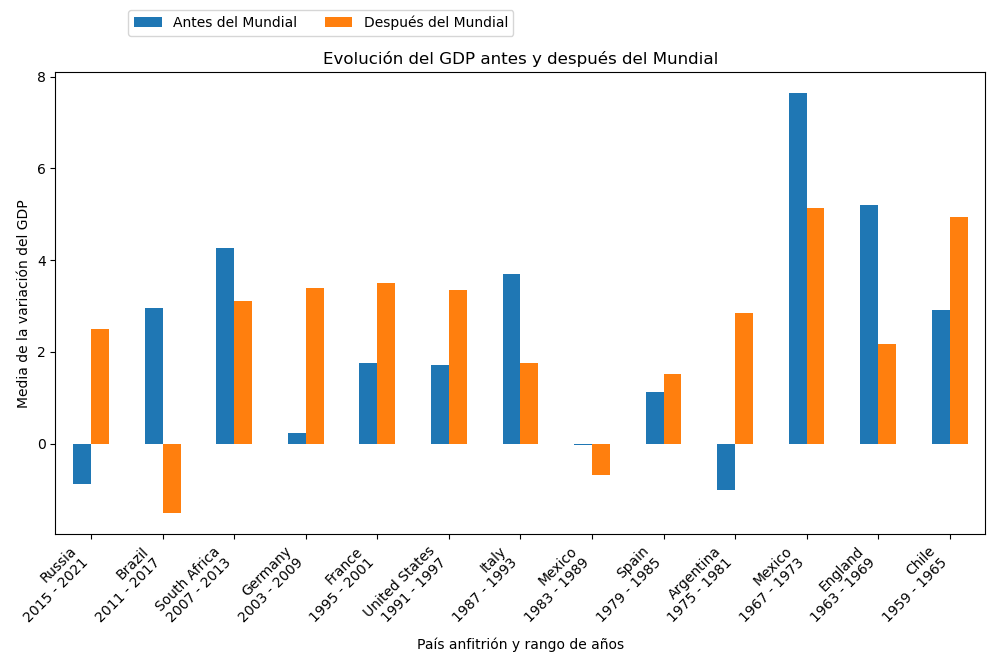

In [14]:

# Seleccionamos los datos relevantes del dataframe df_gdp_filtered
df_gdp_host = pd.DataFrame()
for country in datasetFifa['host'].unique():
    if "Mexico" in country:
        if "1" in country:
            country = "Mexico"
            # Filtramos los datos de GDP correspondientes al país y a los años en que fue anfitrión
            years_host = datasetFifa.loc[datasetFifa['host'] == "Mexico1", 'Year'].values
            df_country = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                        (df_gdp_filtered['year'].isin(years_host))]
            # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años anteriores
            years_before_host = range(int(years_host[0]) - 3, int(years_host[0]) - 1)
            print(years_before_host)
            df_country_before = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                                (df_gdp_filtered['year'].isin(years_before_host))]
            df_country_before = df_country_before.dropna()
            mean_gdp_variation_before = df_country_before.groupby('country_name')['gdp_variation'].mean()

            # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años posteriores
            years_after_host = range(int(years_host[0]), int(years_host[0]) + 2)
            df_country_after = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                            (df_gdp_filtered['year'].isin(years_after_host))]
            df_country_after = df_country_after.dropna()
            mean_gdp_variation_after = df_country_after.groupby('country_name')['gdp_variation'].mean()
            
        else:
            country = "Mexico"
            
            # Filtramos los datos de GDP correspondientes al país y a los años en que fue anfitrión
            years_host = datasetFifa.loc[datasetFifa['host'] == "Mexico2", 'Year'].values
            df_country = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                        (df_gdp_filtered['year'].isin(years_host))]
            
            # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años anteriores
            years_before_host = range(int(years_host[0]) - 3, int(years_host[0]) - 1)
            df_country_before = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                                (df_gdp_filtered['year'].isin(years_before_host))]
            df_country_before = df_country_before.dropna()
            mean_gdp_variation_before = df_country_before.groupby('country_name')['gdp_variation'].mean()

            # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años posteriores
            years_after_host = range(int(years_host[0]), int(years_host[0]) + 2)
            df_country_after = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                            (df_gdp_filtered['year'].isin(years_after_host))]
            df_country_after = df_country_after.dropna()
            mean_gdp_variation_after = df_country_after.groupby('country_name')['gdp_variation'].mean()
    else:
        
        # Filtramos los datos de GDP correspondientes al país y a los años en que fue anfitrión
        years_host = datasetFifa.loc[datasetFifa['host'] == country, 'Year'].values
        df_country = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                    (df_gdp_filtered['year'].isin(years_host))]
        
        # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años anteriores
        years_before_host = range(int(years_host[0]) - 3, int(years_host[0]) - 1)
        df_country_before = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                            (df_gdp_filtered['year'].isin(years_before_host))]
        df_country_before = df_country_before.dropna()
        mean_gdp_variation_before = df_country_before.groupby('country_name')['gdp_variation'].mean()

        # Calculamos la media de la variación del GDP para el país anfitrión en los 4 años posteriores
        years_after_host = range(int(years_host[0]), int(years_host[0]) + 2)
        df_country_after = df_gdp_filtered[(df_gdp_filtered['country_name'] == country) & 
                                        (df_gdp_filtered['year'].isin(years_after_host))]
        df_country_after = df_country_after.dropna()
        mean_gdp_variation_after = df_country_after.groupby('country_name')['gdp_variation'].mean()
    # Añadimos los datos a un nuevo dataframe
    df_country = pd.concat([mean_gdp_variation_before, mean_gdp_variation_after], axis=1)
    df_country.columns = ['Antes del Mundial', 'Después del Mundial']
    df_country['Rango de años'] = f'{years_host[0] - 3} - {years_host[-1] + 3}'
    df_gdp_host = pd.concat([df_gdp_host, df_country], axis=0)

# Creamos la gráfica de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_gdp_host.plot(kind='bar', ax=ax)

# Configuramos los ejes y la leyenda
ax.set_xlabel('País anfitrión y rango de años')
ax.set_ylabel('Media de la variación del GDP')
ax.set_title('Evolución del GDP antes y después del Mundial')

# Cambiamos la posición de la leyenda y agregamos los nombres de los países
ax.legend(labels=['Antes del Mundial', 'Después del Mundial'], bbox_to_anchor=(0.5, 1.15), ncol=2)

# Añadimos el rango de años en el eje x
ax.set_xticklabels(df_gdp_host.index + '\n' + df_gdp_host['Rango de años'], rotation=45, ha='right')

plt.show()

### Mostramos los datos numéricos en un Data Frame para poder ver mejor las diferencias por cada país en cuanto a números

In [15]:
df_gdp_host = df_gdp_host.reset_index(0)
df_gdp_host.head(20)

,country_name,Antes del Mundial,Después del Mundial,Rango de años
0,Russia,-0.889515,2.502661,2015 - 2021
1,Brazil,2.947800,-1.520904,2011 - 2017
2,South Africa,4.275759,3.104145,2007 - 2013
3,Germany,0.237486,3.396449,2003 - 2009
4,France,1.759844,3.505017,1995 - 2001
5,United States,1.707088,3.356505,1991 - 1997
6,Italy,3.693169,1.762111,1987 - 1993
7,Mexico,-0.037804,-0.678258,1983 - 1989
8,Spain,1.125137,1.508289,1979 - 1985
9,Argentina,-1.023332,2.858319,1975 - 1981


<div id='id4'>

## Segunda fase de preprocesamiento de datos
---

In [16]:
df_gdp_host.head(10)

,country_name,Antes del Mundial,Después del Mundial,Rango de años
0,Russia,-0.889515,2.502661,2015 - 2021
1,Brazil,2.947800,-1.520904,2011 - 2017
2,South Africa,4.275759,3.104145,2007 - 2013
3,Germany,0.237486,3.396449,2003 - 2009
4,France,1.759844,3.505017,1995 - 2001
5,United States,1.707088,3.356505,1991 - 1997
6,Italy,3.693169,1.762111,1987 - 1993
7,Mexico,-0.037804,-0.678258,1983 - 1989
8,Spain,1.125137,1.508289,1979 - 1985
9,Argentina,-1.023332,2.858319,1975 - 1981


### Combinación de los datasets

In [17]:
df_mundiales = df_goals_match
df_mundiales = pd.merge(df_mundiales, df_attendance[['Year', 'Hosts', 'Venues', 'Totalattendance †', 'Averageattendance']], on='Year', how='outer')
df_mundiales = pd.merge(df_mundiales, df_goldenBall[['Continent', 'Year']], on='Year', how='outer')
df_mundiales = df_mundiales.rename(columns={'Continent': 'Continent_GB_Winner'})
df_mundiales = pd.merge(df_mundiales, df_young_player[['Continent', 'Year']], on='Year', how='outer')
df_mundiales = df_mundiales.rename(columns={'Continent': 'Continent_GB_Young_winner'})
df_gdp_host = df_gdp_host.rename(columns={'country_name': 'Hosts'})
df_mundiales = pd.merge(df_mundiales, df_gdp_host[['Antes del Mundial', 'Después del Mundial', 'Rango de años', 'Hosts']], on='Hosts', how='outer')
df_mundiales['Diferencia'] = df_mundiales['Después del Mundial'] - df_mundiales['Antes del Mundial']
rango_de_anios = df_mundiales.pop('Rango de años')
df_mundiales['Rango de años'] = rango_de_anios
df_mundiales = df_mundiales.drop(df_mundiales[df_mundiales['Year'] == 2002].index)
df_mundiales = df_mundiales.drop(df_mundiales[df_mundiales['Year'] == 1974].index)

df_mundiales = df_mundiales.sort_values(by='Year', ascending=False)
df_mundiales1 = df_mundiales
df_mundiales.head(20)

,Year,Champion,goals,matches,goals_per_match,Hosts,Venues,Totalattendance †,Averageattendance,Continent_GB_Winner,Continent_GB_Young_winner,Antes del Mundial,Después del Mundial,Diferencia,Rango de años
0,2018,France,169,64,2.640625,Russia,12,"3,031,768","47,371",Europe,Europe,-0.889515,2.502661,3.392175,2015 - 2021
1,2014,Germany,171,64,2.671875,Brazil,12,"3,429,873","53,592",South America,Europe,2.947800,-1.520904,-4.468703,2011 - 2017
2,2010,Spain,145,64,2.265625,South Africa,10,"3,178,856","49,670",South America,Europe,4.275759,3.104145,-1.171614,2007 - 2013
3,2006,Italy,147,64,2.296875,Germany,12,"3,359,439","52,491",Europe,Europe,0.237486,3.396449,3.158963,2003 - 2009
5,1998,France,171,64,2.671875,France,10,"2,785,100","43,517",South America,Europe,1.759844,3.505017,1.745172,1995 - 2001
6,1994,Brazil,141,52,2.711538,United States,9,"3,587,538","68,991",South America,Europe,1.707088,3.356505,1.649417,1991 - 1997
7,1990,Germany,115,52,2.211538,Italy,12,"2,516,215","48,389",Europe,Europe,3.693169,1.762111,-1.931058,1987 - 1993
8,1986,Argentina,132,52,2.538462,Mexico,12,"2,394,031","46,039",South America,Europe,-0.037804,-0.678258,-0.640454,1983 - 1989
9,1986,Argentina,132,52,2.538462,Mexico,12,"2,394,031","46,039",South America,Europe,7.639102,5.132476,-2.506626,1967 - 1973
12,1982,Italy,146,52,2.807692,Spain,17,"2,109,723","40,572",Europe,Europe,1.125137,1.508289,0.383151,1979 - 1985


In [18]:
def obtener_continente(pais):
    continentes = {
        'China': 'Asia',
        'India': 'Asia',
        'Japan': 'Asia',
        'United States': 'America',
        'Canada': 'America',
        'Mexico': 'South America',
        'Argentina': 'South America',
        'Brazil': 'South America',
        'Chile': 'South America',
        'England': 'Europe',
        'Germany': 'Europe',
        'France': 'Europe',
        'Spain': 'Europe',
        'Italy': 'Europe',
        'Nigeria': 'Africa',
        'Egypt': 'Africa',
        'South Africa': 'Africa',
        'Australia': 'Oceania',
        'New Zealand': 'Oceania',
        'Russia': 'Europe'
    }
    return continentes.get(pais, 'Unknown')


In [19]:
continente_dict = {'South America': 1, 'South America ': 1, 'Europe': 2, 'Africa': 3, 'America':4}

for i, row in df_mundiales.iterrows():
    continente = row['Continent_GB_Winner']
    continente_num = continente_dict[continente]
    df_mundiales.at[i, 'Continent_GB_Winner_num'] = continente_num

    continente = row['Continent_GB_Young_winner']
    continente_num = continente_dict[continente]
    df_mundiales.at[i, 'Continent_GB_Young_winner_num'] = continente_num

    pais = row['Champion']
    continente = obtener_continente(pais.strip()) 
    continente_num = continente_dict[continente]
    df_mundiales.at[i, 'Champion_num'] = continente_num

    pais = row['Hosts']
    continente = obtener_continente(pais.strip()) 
    continente_num = continente_dict[continente]
    df_mundiales.at[i, 'Hosts_num'] = continente_num

df_mundiales.head(5)

,Year,Champion,goals,matches,goals_per_match,Hosts,Venues,Totalattendance †,Averageattendance,Continent_GB_Winner,Continent_GB_Young_winner,Antes del Mundial,Después del Mundial,Diferencia,Rango de años,Continent_GB_Winner_num,Continent_GB_Young_winner_num,Champion_num,Hosts_num
0,2018,France,169,64,2.640625,Russia,12,"3,031,768","47,371",Europe,Europe,-0.889515,2.502661,3.392175,2015 - 2021,2.0,2.0,2.0,2.0
1,2014,Germany,171,64,2.671875,Brazil,12,"3,429,873","53,592",South America,Europe,2.947800,-1.520904,-4.468703,2011 - 2017,1.0,2.0,2.0,1.0
2,2010,Spain,145,64,2.265625,South Africa,10,"3,178,856","49,670",South America,Europe,4.275759,3.104145,-1.171614,2007 - 2013,1.0,2.0,2.0,3.0
3,2006,Italy,147,64,2.296875,Germany,12,"3,359,439","52,491",Europe,Europe,0.237486,3.396449,3.158963,2003 - 2009,2.0,2.0,2.0,2.0
5,1998,France,171,64,2.671875,France,10,"2,785,100","43,517",South America,Europe,1.759844,3.505017,1.745172,1995 - 2001,1.0,2.0,2.0,2.0


### Transformación de variables categóricas a valores numéricos

In [20]:
df_mundiales["Totalattendance †"] = df_mundiales["Totalattendance †"].str.replace(',', '').astype(int)
df_mundiales["Averageattendance"] = df_mundiales["Averageattendance"].str.replace(',', '').astype(int)
aux = df_mundiales
for i, row in aux.iterrows():

    pais = row['Champion']
    continente = obtener_continente(pais.strip()) 
    aux.loc[i, "Champion"] = continente

    pais = row['Hosts']
    continente = obtener_continente(pais.strip()) 
    aux.loc[i, "Hosts"] = continente

aux['Continent_GB_Winner'] = aux['Continent_GB_Winner'].str.rstrip()
aux.head(20)

,Year,Champion,goals,matches,goals_per_match,Hosts,Venues,Totalattendance †,Averageattendance,Continent_GB_Winner,Continent_GB_Young_winner,Antes del Mundial,Después del Mundial,Diferencia,Rango de años,Continent_GB_Winner_num,Continent_GB_Young_winner_num,Champion_num,Hosts_num
0,2018,Europe,169,64,2.640625,Europe,12,3031768,47371,Europe,Europe,-0.889515,2.502661,3.392175,2015 - 2021,2.0,2.0,2.0,2.0
1,2014,Europe,171,64,2.671875,South America,12,3429873,53592,South America,Europe,2.947800,-1.520904,-4.468703,2011 - 2017,1.0,2.0,2.0,1.0
2,2010,Europe,145,64,2.265625,Africa,10,3178856,49670,South America,Europe,4.275759,3.104145,-1.171614,2007 - 2013,1.0,2.0,2.0,3.0
3,2006,Europe,147,64,2.296875,Europe,12,3359439,52491,Europe,Europe,0.237486,3.396449,3.158963,2003 - 2009,2.0,2.0,2.0,2.0
5,1998,Europe,171,64,2.671875,Europe,10,2785100,43517,South America,Europe,1.759844,3.505017,1.745172,1995 - 2001,1.0,2.0,2.0,2.0
6,1994,South America,141,52,2.711538,America,9,3587538,68991,South America,Europe,1.707088,3.356505,1.649417,1991 - 1997,1.0,2.0,1.0,4.0
7,1990,Europe,115,52,2.211538,Europe,12,2516215,48389,Europe,Europe,3.693169,1.762111,-1.931058,1987 - 1993,2.0,2.0,2.0,2.0
8,1986,South America,132,52,2.538462,South America,12,2394031,46039,South America,Europe,-0.037804,-0.678258,-0.640454,1983 - 1989,1.0,2.0,1.0,1.0
9,1986,South America,132,52,2.538462,South America,12,2394031,46039,South America,Europe,7.639102,5.132476,-2.506626,1967 - 1973,1.0,2.0,1.0,1.0
12,1982,Europe,146,52,2.807692,Europe,17,2109723,40572,Europe,Europe,1.125137,1.508289,0.383151,1979 - 1985,2.0,2.0,2.0,2.0


<div id='id5'>

## Análisis de componentes principales (PCA) para identificar las variables más influyentes en la rentabilidad de un Mundial para el país anfitrión
-------

In [21]:
# Seleccionar las columnas relevantes para PCA
X = aux[['goals', 'matches','Venues','goals_per_match' ,'Totalattendance †','Averageattendance', 'Continent_GB_Winner', 'Continent_GB_Young_winner', 'Champion', 'Hosts']]
X = pd.get_dummies(X)
# Normalizar los datos
X_norm = (X - X.mean()) / X.std()

# Realizar PCA
pca = PCA()
pca.fit(X_norm)

# Obtener las cargas factoriales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9','PC10','PC11', 'PC12', 'PC13', 'PC14','PC15'], index=X.columns)

# Obtener la varianza explicada por cada componente principal
variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente principal
#print('Varianza explicada por cada componente principal:', variance)

# Obtener los scores de los datos en cada componente principal
scores = pca.transform(X_norm)

# Obtener la correlación entre los scores y la variable "Diferencia"
corr = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9','PC10','PC11', 'PC12', 'PC13', 'PC14','PC15']).corrwith(df_mundiales['Diferencia'])

# Imprimir la correlación de cada componente principal con la variable "Diferencia"


# Imprimir las cargas factoriales
print(tabulate(loadings, headers='keys', floatfmt=".4f"))

# Imprimir la correlación de cada componente principal con la variable "Diferencia"
print('')
print('Correlación con la variable "Diferencia":')
print(corr)

# Obtener los porcentajes de varianza acumulada
cumulative_variance = np.cumsum(variance)

# Crear una tabla con los porcentajes de varianza acumulada
variance_table = pd.DataFrame({
    'Componente Principal': range(1, len(variance)+1),
    'Porcentaje de Varianza Explicada': variance,
    'Porcentaje de Varianza Acumulada': cumulative_variance
})

# Imprimir la tabla con los porcentajes de varianza acumulada
print('')
print('Porcentaje de Varianza Explicada y Acumulada por Componente Principal:')
print(tabulate(variance_table, headers='keys', floatfmt=".4f", showindex=False))


                                             PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8      PC9     PC10     PC11     PC12     PC13     PC14     PC15
---------------------------------------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
goals                                    -0.2786   0.2561  -0.0347  -0.0728  -0.3782  -0.2046   0.1615   0.3238  -0.2040  -0.0847  -0.5953   0.3624  -0.0000  -0.0000  -0.0000
matches                                  -0.3140   0.2461  -0.1186  -0.0832  -0.1857   0.0717   0.0590   0.2869  -0.2529  -0.0173   0.1499  -0.7796   0.0000   0.0000   0.0000
Venues                                   -0.2991   0.0539  -0.0318   0.0319  -0.3426   0.2251   0.5701  -0.6028   0.1713   0.1256   0.0615   0.0161  -0.0000  -0.0000  -0.0000
goals_per_match                           0.2544  -0.0902   0.2843  -0.0402  -0.3195  -0.6692   0.2651   0.0513   0.2183  -0.

<div id='id6'>

## Clustering
---

c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

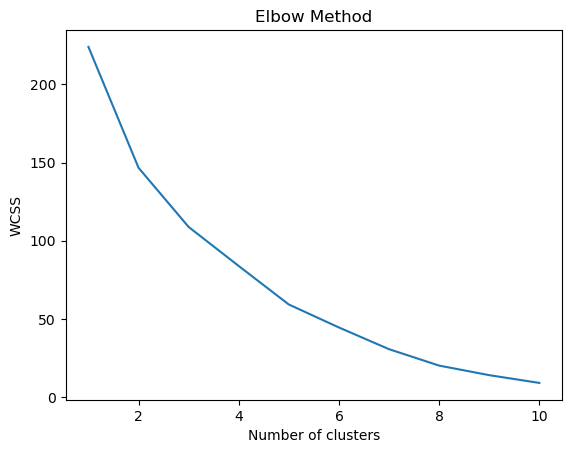

In [22]:
# Determinar el número óptimo de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Agrupación de individuos según sus características, representando el 65% de los datos mediante 2 componentes

c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


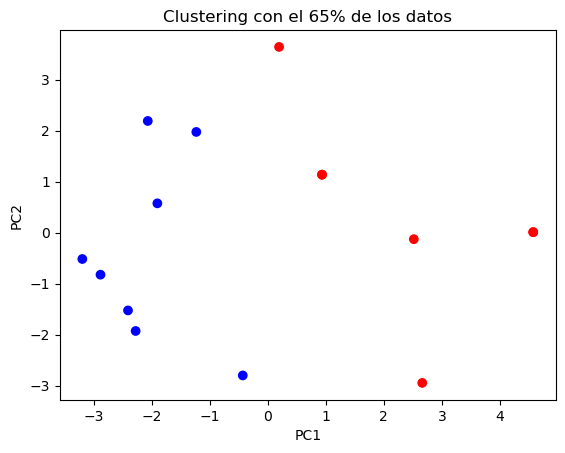

In [23]:
kmeans = KMeans(n_clusters=2, random_state=120)
kmeans.fit(X_norm)
labels = kmeans.labels_

colors = OrderedDict({0: 'blue', 1: 'red'})

pca_df = pca.transform(X_norm)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9','PC10','PC11', 'PC12', 'PC13', 'PC14','PC15'])
pca_df['Cluster'] = labels
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=[colors[l] for l in labels])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering con el 65% de los datos')
plt.show()


### Agrupación de individuos según sus características, representando el 75% de los datos mediante 3 componentes

c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


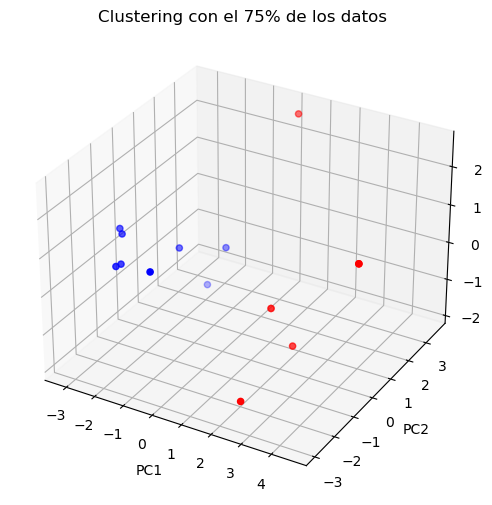

In [24]:
kmeans = KMeans(n_clusters=2, random_state=300)
kmeans.fit(X_norm)
labels = kmeans.labels_

colors = OrderedDict({0: 'blue', 1: 'red'})

pca_df = pca.transform(X_norm)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9','PC10','PC11', 'PC12', 'PC13', 'PC14','PC15'])
pca_df['Cluster'] = labels
from mpl_toolkits.mplot3d import Axes3D

# Crear gráfico en 3D
fig = plt.figure(figsize=(6,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=[colors[l] for l in labels])

# Establecer etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clustering con el 75% de los datos')

plt.show()

<div id='id7'>

## Regresión lineal
---

In [25]:
aux = 0
for gol in df_mundiales['goals']:
    aux += int(gol)

media_goles = aux/15

aux = 0
for gol in df_mundiales['goals_per_match']:
    aux += int(gol)

media_goles_per_match = aux/15


### Modelo de predicción de la rentabilidad de España como anfitrión del Mundial

El cálculo del Total Attendance se realizó sumando la asistencia total de los estadios Camp Nou y Wanda Metropolitano para los 80 partidos del Mundial. La media de asistencia se obtuvo a partir de los datos oficiales proporcionados por la liga.

In [26]:
# Crear el modelo de regresión
# Seleccionar las variables independientes (características) y la variable dependiente (diferencia)
X = df_mundiales[['goals', 'matches','Venues','goals_per_match' ,'Totalattendance †','Averageattendance', 'Continent_GB_Winner_num', 'Continent_GB_Young_winner_num', 'Champion_num', 'Hosts_num']]
y = df_mundiales['Diferencia']

model = LinearRegression()
model.fit(X, y)

# Predecir la diferencia para un hipotético Mundial organizado en España
prediccion = model.predict([[round(media_goles, 0), 80, 15, round(media_goles_per_match, 0), 1938416, 22829, 1, 2, 2, 2]])
print(prediccion)

[18.9579058]


c:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Visualización de la evolución de los goles en los mundiales a lo largo del tiempo: análisis de los goles totales anotados en cada mundial y los goles promedio por partido a lo largo de las ediciones.

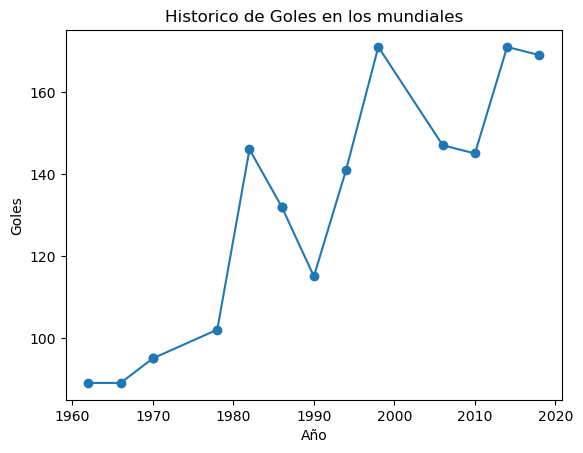

In [27]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear la gráfica de línea de los goles por partido en función del año
ax.plot(df_mundiales['Year'], df_mundiales['goals'], '-o')

# Configurar el eje x y el eje y
ax.set_xlabel('Año')
ax.set_ylabel('Goles')
plt.title("Historico de Goles en los mundiales")
# Mostrar la gráfica
plt.show()

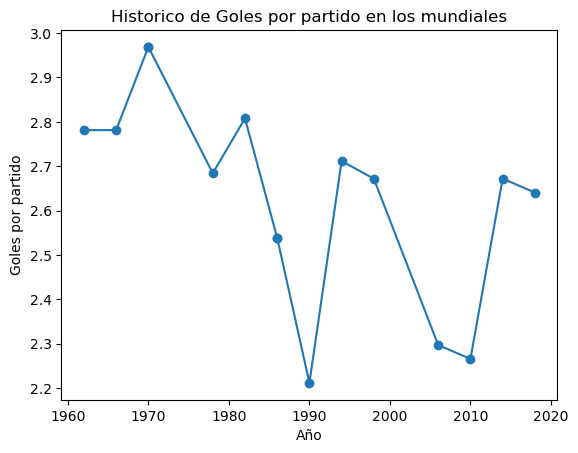

In [28]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear la gráfica de línea de los goles por partido en función del año
ax.plot(df_mundiales['Year'], df_mundiales['goals_per_match'], '-o')

# Configurar el eje x y el eje y
ax.set_xlabel('Año')
ax.set_ylabel('Goles por partido')
plt.title("Historico de Goles por partido en los mundiales")
# Mostrar la gráfica
plt.show()